In [10]:
# importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
pip install numpy pandas sklearn 


Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
#Read the data
df=pd.read_csv('C:\\Users\PB\Desktop\EXL EQ\\EQ_2021_Data_Sample.csv')

#Get shape and head
df.shape
df.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.shape

(1179375, 82)

In [27]:
print (df.columns)

Index(['countyFIPS', 'stateFIPS', 'date', 'confirmed_cases', 'deaths',
       'google_mobility_retail_and_recreation',
       'google_mobility_grocery_and_pharmacy', 'google_mobility_parks',
       'google_mobility_transit_stations', 'google_mobility_workplaces',
       'google_mobility_residential', 'apple_mobility_driving',
       'apple_mobility_transit', 'apple_mobility_walking',
       'Electricity_Sales_ Revenue_Residential ($ x1000)',
       'Electricity_Sales_ Sales_Residential (MWHr)',
       'Electricity_Sales_ Customers_Count_Residential',
       'Electricity_Sales_ Revenue_Commercial ($ x1000)',
       'Electricity_Sales_ Sales_Commercial (MWHr)',
       'Electricity_Sales_ Customers_Count_Commercial',
       'Electricity_Sales_ Revenue_Industrial ($ x1000)',
       'Electricity_Sales_ Sales_Industrial (MWHr)',
       'Electricity_Sales_ Customers_Count_Industrial',
       'Electricity_Sales_ Revenue_Transportation ($ x1000)',
       'Electricity_Sales_ Sales_Transportation

In [29]:
dates = df['date']
date_format = [pd.to_datetime(d) for d in dates]

In [39]:
data=df[['countyFIPS', 'stateFIPS', 'date', 'confirmed_cases','C_TOT_POP','new_test_rate', 'new_test_count']]

In [40]:
print('_'*20);print('HEAD');print('_'*20)
print(data.head())

____________________
HEAD
____________________
   countyFIPS  stateFIPS        date  confirmed_cases  C_TOT_POP  \
0        1001          1  2020-01-22                0    55514.0   
1        1003          1  2020-01-22                0   190790.0   
2        1005          1  2020-01-22                0    27201.0   
3        1007          1  2020-01-22                0    22597.0   
4        1009          1  2020-01-22                0    57826.0   

  new_test_rate new_test_count  
0             .              .  
1             .              .  
2             .              .  
3             .              .  
4             .              .  


____________________
PREPARE DATA
____________________


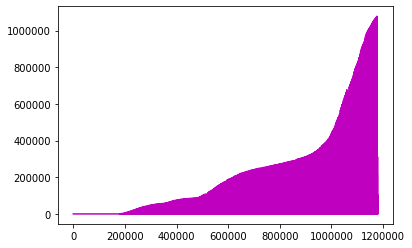

[[1.00000000e+00 1.00100000e+03 1.00200100e+06]
 [1.00000000e+00 1.00300000e+03 1.00600900e+06]
 [1.00000000e+00 1.00500000e+03 1.01002500e+06]
 ...
 [1.00000000e+00 5.60410000e+04 3.14059368e+09]
 [1.00000000e+00 5.60430000e+04 3.14081785e+09]
 [1.00000000e+00 5.60450000e+04 3.14104202e+09]]


In [44]:
print('_'*20);print('PREPARE DATA');print('_'*20)
x=np.array(data['countyFIPS']).reshape(-1,1)
y=np.array(data['confirmed_cases']).reshape(-1,1)
plt.plot(y,'-m')
plt.show()
polyFeat= PolynomialFeatures(degree=2)
x=polyFeat.fit_transform(x)
print(x)